
================= Lab COLOR SPACE =================


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 234MB/s]


[Lab] Epoch 1/15 - Train Acc: 0.9669, Val Acc: 0.9901
[Lab] Epoch 2/15 - Train Acc: 0.9878, Val Acc: 0.9940
[Lab] Epoch 3/15 - Train Acc: 0.9907, Val Acc: 0.9931
[Lab] Epoch 4/15 - Train Acc: 0.9928, Val Acc: 0.9851
[Lab] Epoch 5/15 - Train Acc: 0.9937, Val Acc: 0.9937
[Lab] Epoch 6/15 - Train Acc: 0.9944, Val Acc: 0.9941
[Lab] Epoch 7/15 - Train Acc: 0.9961, Val Acc: 0.9950
[Lab] Epoch 8/15 - Train Acc: 0.9959, Val Acc: 0.9951
[Lab] Epoch 9/15 - Train Acc: 0.9960, Val Acc: 0.9931
[Lab] Epoch 10/15 - Train Acc: 0.9965, Val Acc: 0.9954
[Lab] Epoch 11/15 - Train Acc: 0.9971, Val Acc: 0.9933
[Lab] Epoch 12/15 - Train Acc: 0.9965, Val Acc: 0.9952
[Lab] Epoch 13/15 - Train Acc: 0.9974, Val Acc: 0.9947
[Lab] Epoch 14/15 - Train Acc: 0.9975, Val Acc: 0.9934
[Lab] Epoch 15/15 - Train Acc: 0.9973, Val Acc: 0.9956


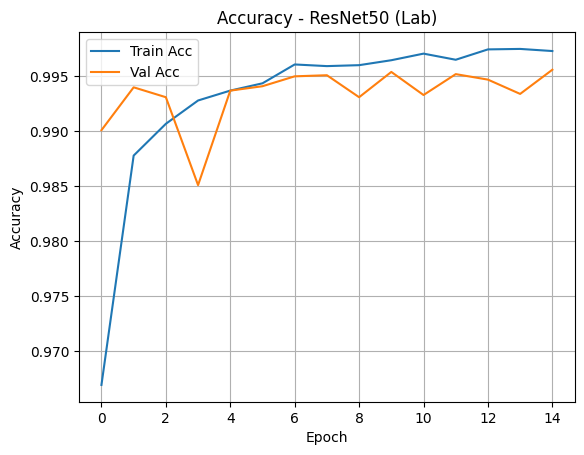


✅ Test Accuracy (Lab): 99.56%

Classification Report (Lab):
                  precision    recall  f1-score   support

     Anthracnose       1.00      0.99      0.99      1634
Bacterial Canker       1.00      1.00      1.00      1664
           Galls       0.99      1.00      0.99      1596
         Healthy       1.00      1.00      1.00      1793
          Mildew       0.99      1.00      0.99      1671
          Scorch       0.99      1.00      0.99      1643

        accuracy                           1.00     10001
       macro avg       1.00      1.00      1.00     10001
    weighted avg       1.00      1.00      1.00     10001



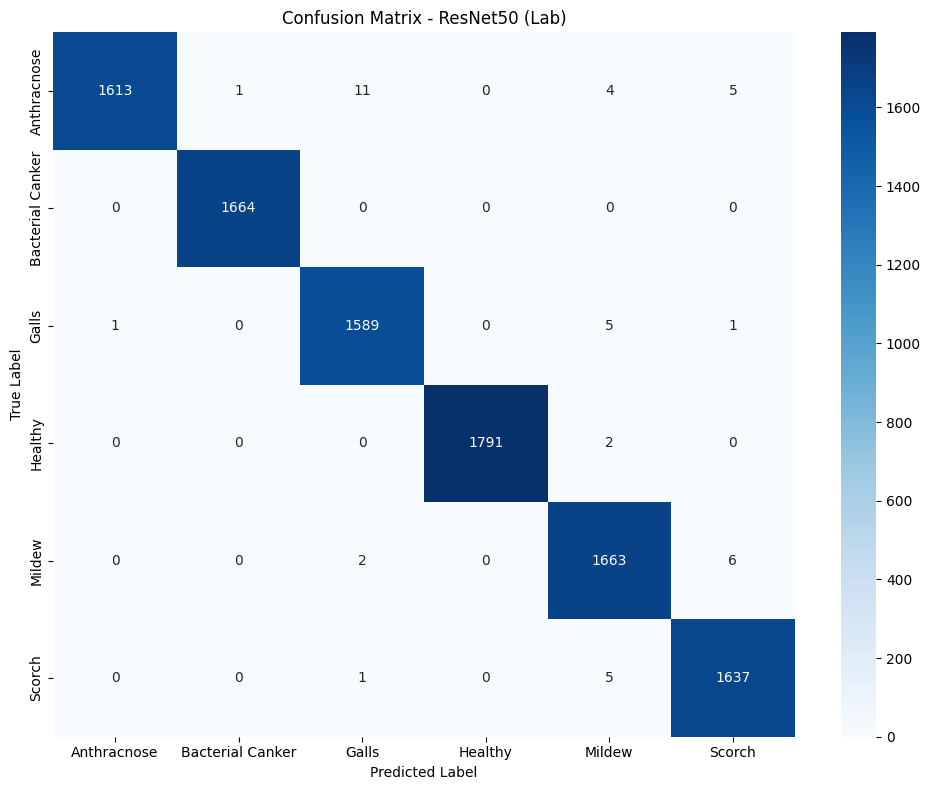


================= YCbCr COLOR SPACE =================


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[YCbCr] Epoch 1/15 - Train Acc: 0.9677, Val Acc: 0.9904
[YCbCr] Epoch 2/15 - Train Acc: 0.9872, Val Acc: 0.9940
[YCbCr] Epoch 3/15 - Train Acc: 0.9911, Val Acc: 0.9902
[YCbCr] Epoch 4/15 - Train Acc: 0.9923, Val Acc: 0.9938


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
import os

# ✅ Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Paths
train_dir = '/kaggle/input/diffmango224x224/AMBADIFUSEDATASET224X224/train'
val_dir   = '/kaggle/input/diffmango224x224/AMBADIFUSEDATASET224X224/val'
test_dir  = '/kaggle/input/diffmango224x224/AMBADIFUSEDATASET224X224/test'

# ✅ Parameters
NUM_CLASSES = 6
BATCH_SIZE = 16
NUM_EPOCHS = 15
LR = 1e-4
IMG_SIZE = 224

class_names = ['Anthracnose', 'Bacterial Canker', 'Galls', 'Healthy', 'Mildew', 'Scorch']

# ✅ Custom color converters
class ConvertToLab:
    def __call__(self, img):
        img = np.array(img)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
        return Image.fromarray(img)

class ConvertToYCbCr:
    def __call__(self, img):
        img = np.array(img)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
        return Image.fromarray(img)

class ConvertToHSV:
    def __call__(self, img):
        return img.convert("HSV")

# ✅ Main training & evaluation pipeline
def run_pipeline(color_space_name, converter):
    print(f"\n================= {color_space_name} COLOR SPACE =================")

    # Dummy mean/std for normalization
    mean = [0.5, 0.5, 0.5]
    std = [0.5, 0.5, 0.5]

    transform = transforms.Compose([
        converter,
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])

    # Load Datasets
    train_dataset = datasets.ImageFolder(train_dir, transform=transform)
    val_dataset   = datasets.ImageFolder(val_dir, transform=transform)
    test_dataset  = datasets.ImageFolder(test_dir, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
    test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

    # Load Pretrained ResNet50
    model = models.resnet50(pretrained=True)
    model.fc = nn.Sequential(
        nn.Linear(model.fc.in_features, 512),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(512, NUM_CLASSES)
    )
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LR)

    # ✅ Train
    history = {'train_acc': [], 'val_acc': []}
    for epoch in range(NUM_EPOCHS):
        model.train()
        correct = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            correct += torch.sum(preds == labels.data)
        train_acc = correct.double() / len(train_loader.dataset)
        history['train_acc'].append(train_acc.item())

        model.eval()
        val_correct = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                val_correct += torch.sum(preds == labels.data)
        val_acc = val_correct.double() / len(val_loader.dataset)
        history['val_acc'].append(val_acc.item())

        print(f"[{color_space_name}] Epoch {epoch+1}/{NUM_EPOCHS} - Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

    # ✅ Accuracy Plot
    plt.figure()
    plt.plot(history['train_acc'], label='Train Acc')
    plt.plot(history['val_acc'], label='Val Acc')
    plt.title(f'Accuracy - ResNet50 ({color_space_name})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ✅ Test Evaluation
    model.eval()
    y_true, y_pred = [], []
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    # ✅ Test Accuracy
    test_accuracy = 100 * correct / total
    print(f"\n✅ Test Accuracy ({color_space_name}): {test_accuracy:.2f}%")

    # ✅ Classification Report
    print(f"\nClassification Report ({color_space_name}):")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # ✅ Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title(f"Confusion Matrix - ResNet50 ({color_space_name})")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()


# ✅ Run pipeline for all 3 color spaces
run_pipeline('Lab',   ConvertToLab())
run_pipeline('YCbCr', ConvertToYCbCr())
run_pipeline('HSV',   ConvertToHSV())



================= YCbCr COLOR SPACE =================


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 212MB/s]


[YCbCr] Epoch 1/15 - Train Acc: 0.9668, Val Acc: 0.9879
[YCbCr] Epoch 2/15 - Train Acc: 0.9869, Val Acc: 0.9823
[YCbCr] Epoch 3/15 - Train Acc: 0.9915, Val Acc: 0.9943
[YCbCr] Epoch 4/15 - Train Acc: 0.9926, Val Acc: 0.9794
[YCbCr] Epoch 5/15 - Train Acc: 0.9936, Val Acc: 0.9956
[YCbCr] Epoch 6/15 - Train Acc: 0.9948, Val Acc: 0.9902
[YCbCr] Epoch 7/15 - Train Acc: 0.9958, Val Acc: 0.9944
[YCbCr] Epoch 8/15 - Train Acc: 0.9959, Val Acc: 0.9952
[YCbCr] Epoch 9/15 - Train Acc: 0.9964, Val Acc: 0.9936
[YCbCr] Epoch 10/15 - Train Acc: 0.9965, Val Acc: 0.9948
[YCbCr] Epoch 11/15 - Train Acc: 0.9963, Val Acc: 0.9928
[YCbCr] Epoch 12/15 - Train Acc: 0.9971, Val Acc: 0.9949
[YCbCr] Epoch 13/15 - Train Acc: 0.9977, Val Acc: 0.9950
[YCbCr] Epoch 14/15 - Train Acc: 0.9978, Val Acc: 0.9963
[YCbCr] Epoch 15/15 - Train Acc: 0.9973, Val Acc: 0.9955


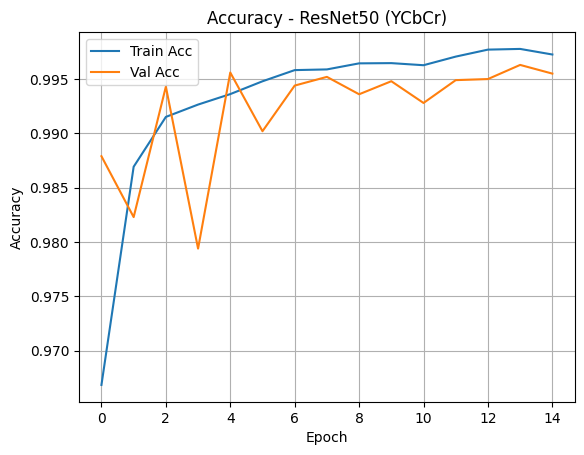


✅ Test Accuracy (YCbCr): 99.59%

Classification Report (YCbCr):
                  precision    recall  f1-score   support

     Anthracnose       1.00      0.99      0.99      1634
Bacterial Canker       1.00      1.00      1.00      1664
           Galls       0.99      0.99      0.99      1596
         Healthy       1.00      1.00      1.00      1793
          Mildew       0.99      0.99      0.99      1671
          Scorch       0.99      1.00      0.99      1643

        accuracy                           1.00     10001
       macro avg       1.00      1.00      1.00     10001
    weighted avg       1.00      1.00      1.00     10001



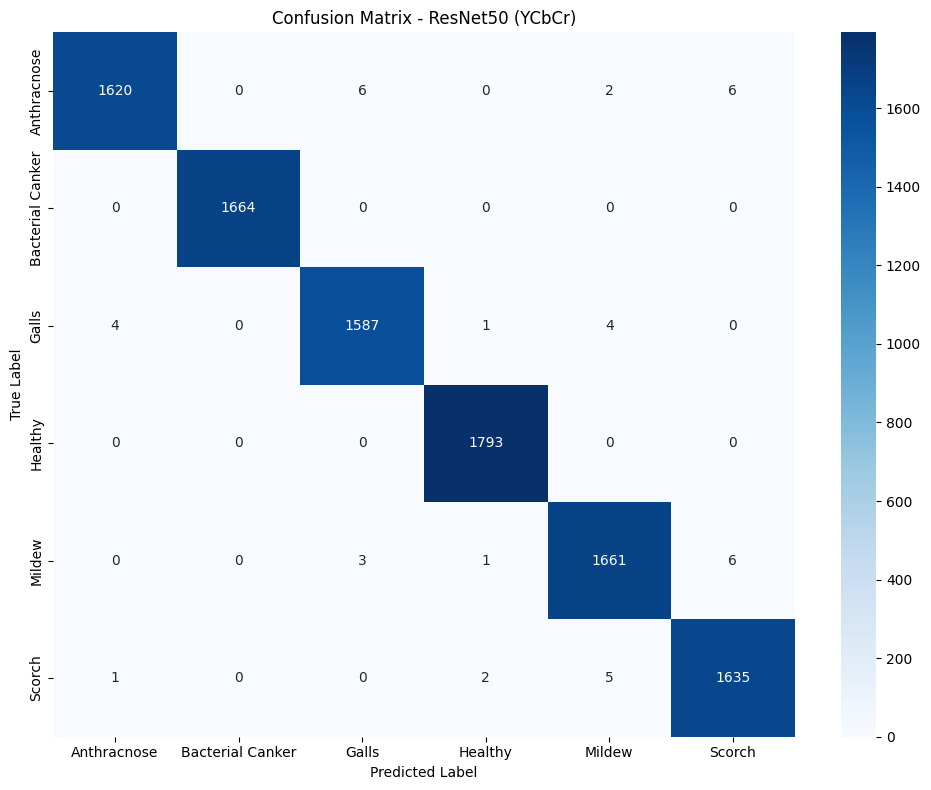


================= HSV COLOR SPACE =================


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[HSV] Epoch 1/15 - Train Acc: 0.9617, Val Acc: 0.9789
[HSV] Epoch 2/15 - Train Acc: 0.9869, Val Acc: 0.9935
[HSV] Epoch 3/15 - Train Acc: 0.9910, Val Acc: 0.9768
[HSV] Epoch 4/15 - Train Acc: 0.9922, Val Acc: 0.9897
[HSV] Epoch 5/15 - Train Acc: 0.9925, Val Acc: 0.9928
[HSV] Epoch 6/15 - Train Acc: 0.9946, Val Acc: 0.9941
[HSV] Epoch 7/15 - Train Acc: 0.9945, Val Acc: 0.9955
[HSV] Epoch 8/15 - Train Acc: 0.9964, Val Acc: 0.9938
[HSV] Epoch 9/15 - Train Acc: 0.9957, Val Acc: 0.9937
[HSV] Epoch 10/15 - Train Acc: 0.9963, Val Acc: 0.9940
[HSV] Epoch 11/15 - Train Acc: 0.9961, Val Acc: 0.9948
[HSV] Epoch 12/15 - Train Acc: 0.9968, Val Acc: 0.9938
[HSV] Epoch 13/15 - Train Acc: 0.9970, Val Acc: 0.9930
[HSV] Epoch 14/15 - Train Acc: 0.9976, Val Acc: 0.9954
[HSV] Epoch 15/15 - Train Acc: 0.9972, Val Acc: 0.9940


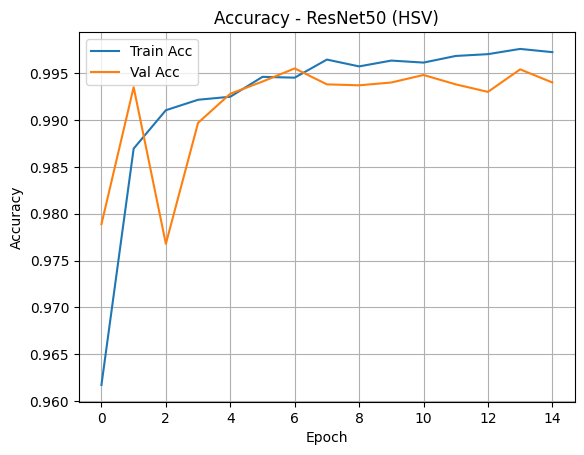


✅ Test Accuracy (HSV): 99.45%

Classification Report (HSV):
                  precision    recall  f1-score   support

     Anthracnose       1.00      0.98      0.99      1634
Bacterial Canker       1.00      1.00      1.00      1664
           Galls       0.99      0.99      0.99      1596
         Healthy       1.00      1.00      1.00      1793
          Mildew       0.99      0.99      0.99      1671
          Scorch       0.99      0.99      0.99      1643

        accuracy                           0.99     10001
       macro avg       0.99      0.99      0.99     10001
    weighted avg       0.99      0.99      0.99     10001



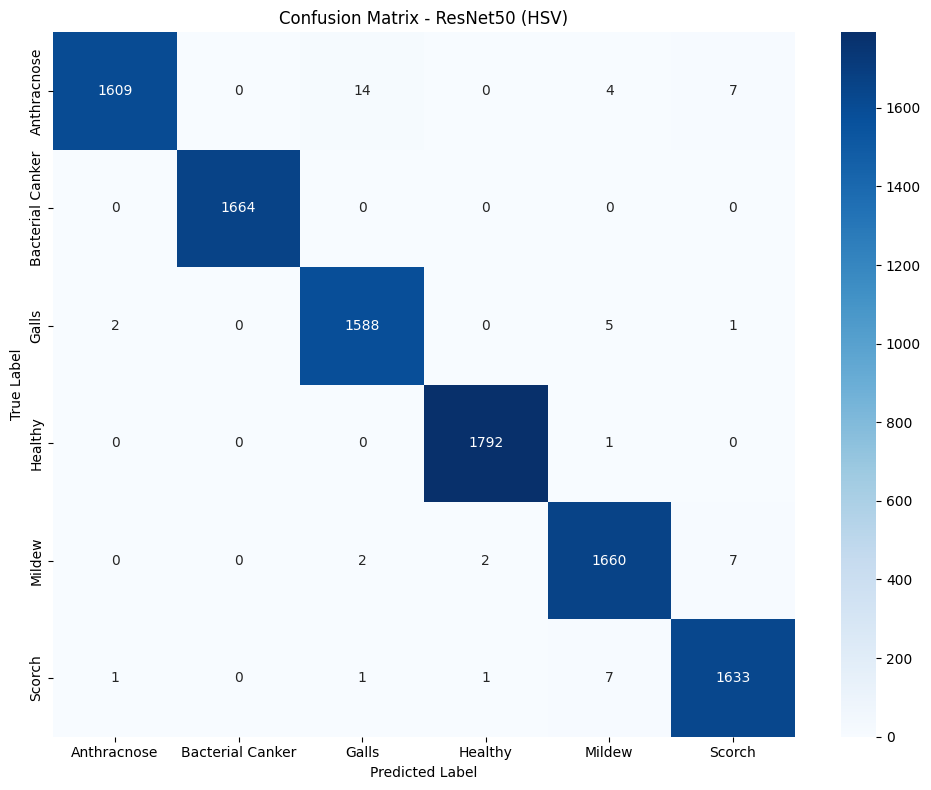

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
import os

# ✅ Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Paths
train_dir = '/kaggle/input/diffmango224x224/AMBADIFUSEDATASET224X224/train'
val_dir   = '/kaggle/input/diffmango224x224/AMBADIFUSEDATASET224X224/val'
test_dir  = '/kaggle/input/diffmango224x224/AMBADIFUSEDATASET224X224/test'

# ✅ Parameters
NUM_CLASSES = 6
BATCH_SIZE = 16
NUM_EPOCHS = 15
LR = 1e-4
IMG_SIZE = 224

class_names = ['Anthracnose', 'Bacterial Canker', 'Galls', 'Healthy', 'Mildew', 'Scorch']



class ConvertToYCbCr:
    def __call__(self, img):
        img = np.array(img)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
        return Image.fromarray(img)

class ConvertToHSV:
    def __call__(self, img):
        return img.convert("HSV")

# ✅ Main training & evaluation pipeline
def run_pipeline(color_space_name, converter):
    print(f"\n================= {color_space_name} COLOR SPACE =================")

    # Dummy mean/std for normalization
    mean = [0.5, 0.5, 0.5]
    std = [0.5, 0.5, 0.5]

    transform = transforms.Compose([
        converter,
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])

    # Load Datasets
    train_dataset = datasets.ImageFolder(train_dir, transform=transform)
    val_dataset   = datasets.ImageFolder(val_dir, transform=transform)
    test_dataset  = datasets.ImageFolder(test_dir, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
    test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

    # Load Pretrained ResNet50
    model = models.resnet50(pretrained=True)
    model.fc = nn.Sequential(
        nn.Linear(model.fc.in_features, 512),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(512, NUM_CLASSES)
    )
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LR)

    # ✅ Train
    history = {'train_acc': [], 'val_acc': []}
    for epoch in range(NUM_EPOCHS):
        model.train()
        correct = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            correct += torch.sum(preds == labels.data)
        train_acc = correct.double() / len(train_loader.dataset)
        history['train_acc'].append(train_acc.item())

        model.eval()
        val_correct = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                val_correct += torch.sum(preds == labels.data)
        val_acc = val_correct.double() / len(val_loader.dataset)
        history['val_acc'].append(val_acc.item())

        print(f"[{color_space_name}] Epoch {epoch+1}/{NUM_EPOCHS} - Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

    # ✅ Accuracy Plot
    plt.figure()
    plt.plot(history['train_acc'], label='Train Acc')
    plt.plot(history['val_acc'], label='Val Acc')
    plt.title(f'Accuracy - ResNet50 ({color_space_name})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ✅ Test Evaluation
    model.eval()
    y_true, y_pred = [], []
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    # ✅ Test Accuracy
    test_accuracy = 100 * correct / total
    print(f"\n✅ Test Accuracy ({color_space_name}): {test_accuracy:.2f}%")

    # ✅ Classification Report
    print(f"\nClassification Report ({color_space_name}):")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # ✅ Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title(f"Confusion Matrix - ResNet50 ({color_space_name})")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()


# ✅ Run pipeline for all 3 color spaces

run_pipeline('YCbCr', ConvertToYCbCr())
run_pipeline('HSV',   ConvertToHSV())
